## Support Vector Machines can be used for both classification and regression

#### SVC - Support Vector Classifier
#### SVR - Support Vector Regressor

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(f"feature_names: {iris['feature_names']}\n")
print(f"target_names: {iris['target_names']}\n")

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names: ['setosa' 'versicolor' 'virginica']



#### Creating a dataset out of the raw data

In [8]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
## All records where target == 0 ...i.e. setosa 
# df[df['target'] == 0]

## All records where target == 1 ...i.e. versicolor
# df[df['target'] == 1]

## All records where target == 2 ...i.e. virginica
# df[df['target'] == 2]

## We come to know that there are 50 records of each category



In the above dataframe, target columns contain categories 0,1,2... which correspond to 'setosa', 'versicolor', 'virginica' respectively

So, Applying  the actual names accordingly


In [13]:
df['flower_name'] = df['target'].apply(lambda x: iris['target_names'][x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%matplotlib inline

## concept specific only to jupyter notebook

creating 3 separate dataframes for 3 species

In [17]:
df0 = df[df['target'] == 0]  # Setosa
df1 = df[df['target'] == 1]  # versicolor
df2 = df[df['target'] == 2]  # Virginica

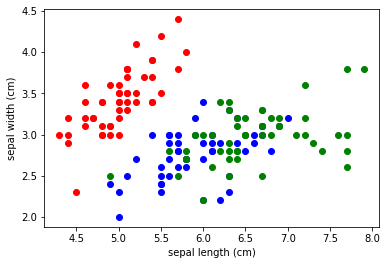

In [21]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color= 'red') # setosa
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color= 'blue') # versicolor
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color= 'green') # virginica
plt.show()

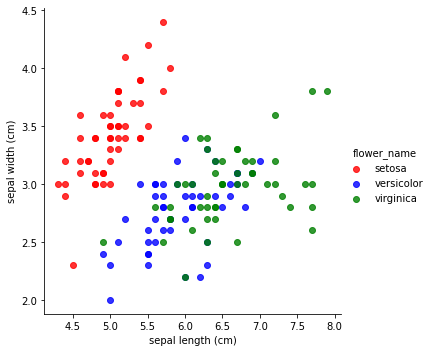

In [26]:
sns.lmplot(x = "sepal length (cm)", 
            y = 'sepal width (cm)',
            data = df,
            hue = "flower_name", 
            legend = True,
           palette = ["red",'blue',"green",],
            fit_reg = False,)

##### in terms of sepal width and sepal length 

Here, we can observe that there exists a clear demarcation / decision boundary between red(i.e. setosa) and the rest [blue(i.e. versicolor), green(i.e virginica)]



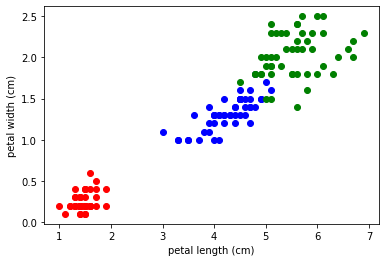

In [22]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color= 'red') # setosa
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color= 'blue') # versicolor
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color= 'green') # virginica
plt.show()

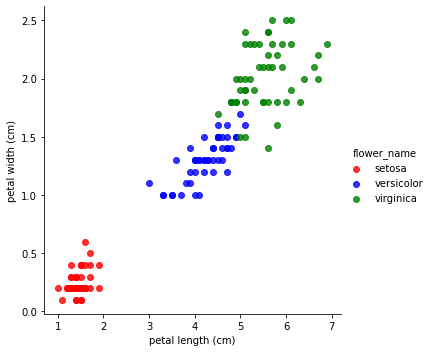

In [27]:
sns.lmplot(x = "petal length (cm)", 
            y = 'petal width (cm)',
            data = df,
            hue = "flower_name", 
            legend = True,
           palette = ["red",'blue',"green",],
            fit_reg = False,)

##### in terms of sepal width and sepal length 

Here, we can observe that there exists a clear demarcation / decision boundary between all categories

## SVM MODEL

In [28]:
X = df.drop(['target', 'flower_name'], axis = 1)

In [30]:
Y =  df['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 28)
# Specifying the random_state so that the model is splitted in the same way everytime the code is re-run... to acieve consistency

In [32]:
from sklearn.svm import SVC

A kernel helps us find a hyperplane in the higher dimensional space without increasing the computational cost. Basically it is the hyperplane which separates classes or is used to predict values

#### kernel options (default: rbf):
1. ‘linear’
2. ‘poly’   i.e. polynomial
3. ‘rbf’  i.e. radial basis function
4. ‘sigmoid’
5. ‘precomputed’
6. exponential

In [33]:
model = SVC()

In [34]:
model.fit(X_train, y_train)

SVC()

In [38]:
predictions1 = model.predict(X_test)

In [39]:
model.score(X_test, y_test)

0.9666666666666667

In [41]:
ac1 = accuracy_score(y_test, predictions)
ac1

0.9666666666666667

####  Rebuilding the model iteratively to see the effect of fine tuning parameters like regularization and gamma values on the accuracy

In [128]:
model1 = SVC(C =0.11)
# C value must be positive float value
# our model is not affetcted much if the C value is more than 0.2...even upto 100.. (accuracy score is 0.96667)
# but , the accuracy id affected severely if it is reduced below 0.2


# However, it is only limited to this data... it can vary from dataset to dataset

In [129]:
model1.fit(X_train, y_train)

SVC(C=0.11)

In [130]:
model1.score(X_test, y_test)

0.9333333333333333

In [133]:
model2 = SVC(gamma = 0.06)
# can be 'auto', 'scale', float
# please try different values of gamma as it gives varied results
model2.fit(X_train, y_train)

SVC(gamma=0.06)

In [134]:
model2.score(X_test, y_test)

0.9666666666666667

### Based on trial and error, find the optimum tuning parameters for your data